<a href="https://colab.research.google.com/github/VamuveTV/AVISubDetector/blob/main/Copy_of_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DBSCAN Clustering

# Importing the libraries
import numpy as np
import pandas as pd

This dataset has annual income and spending score of mall customers and we cluster them using this data


In [ ]:
# Importing the dataset
file = r'/content/sample_data/california_housing_test.csv'
dataset = pd.read_csv(file)
X = dataset.iloc[:, [3, 4]].values
X

array([[3885.,  661.],
       [1510.,  310.],
       [3589.,  507.],
       ...,
       [ 956.,  201.],
       [  96.,   14.],
       [1765.,  263.]])

The epsilon paramerter shows the radius.
The min_sample parameter shows the minimum no of points required to classify as a core point.There is a third parameter named metric which signifies how we measure distance  by default it is eucliedian, so no need to mention explicitly

In [ ]:
len(X)

3000

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=4)


Here labels refers to the clusters 0-8 means 9 clusters are formed.
-1 signifies that the datapoint is noise and not clustered with any cluster

In [ ]:
# Fitting the model

model=dbscan.fit(X)

labels=model.labels_
labels


array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)
sample_cores


array([False, False, False, ..., False, False, False])

True represents that it is not an outlier and is clustered in some group

In [ ]:
sample_cores[dbscan.core_sample_indices_]=True
sample_cores

array([False, False, False, ..., False, False, False])

In [ ]:
#Calculating the number of clusters

n_clusters = len(set(labels))- (1 if -1 in labels else 0)
n_clusters

0

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

In [ ]:
print(metrics.silhouette_score(X,labels))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

['y', 'b', 'g', 'r', 'r', 'm', 'c', 'y', 'b']


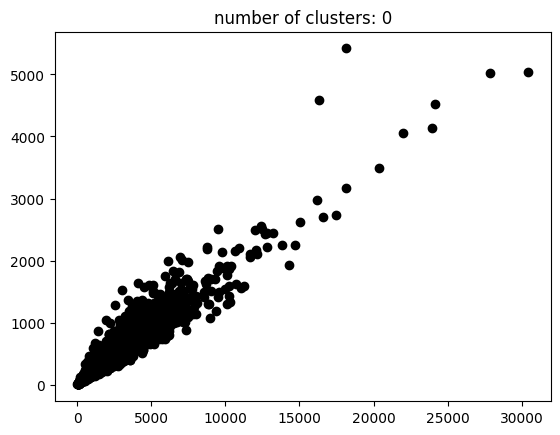

In [ ]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r', 'r', 'm' ,'c' ,'y' ,'b']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & sample_cores]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                                      markeredgecolor='k',
                                      markersize=6)

    xy = X[class_member_mask & ~sample_cores]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                                      markeredgecolor='k',
                                      markersize=6)

plt.title('number of clusters: %d' %n_clusters)
plt.show()